In [256]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt 

In [257]:
df=pd.read_csv('./train.csv')
df['Date']=pd.to_datetime(df['Date'])
df.sort_values(by=['Date'],inplace=True,ascending=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [258]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<AxesSubplot:>

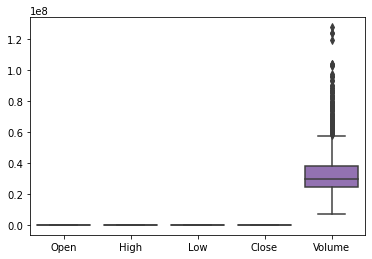

In [259]:
sns.boxplot(data=df)
#sns.boxplot(data=df['Open'])



#volume has outliers

<AxesSubplot:>

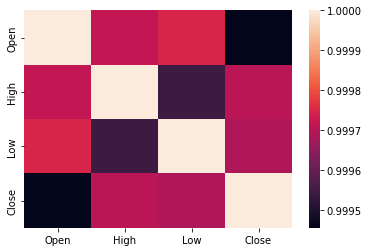

In [260]:
check=df.drop(['Volume'],axis=1)
corr=check.corr()
sns.heatmap(corr)

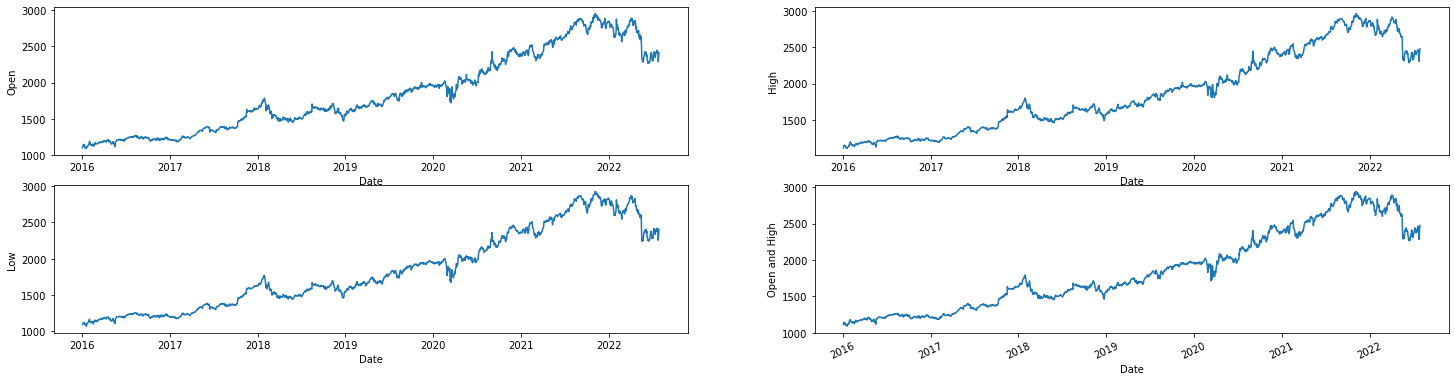

In [261]:
#close is target variable
fig,ax =  plt.subplots( 2,2,figsize = ( 25, 6))
sns.lineplot(ax=ax[0][0],x = "Date", y = "Open", data = df)
sns.lineplot(ax=ax[0][1],x = "Date", y = "High", data = df)
sns.lineplot(ax=ax[1][0],x = "Date", y = "Low", data = df)
sns.lineplot(ax=ax[1][1],x = "Date", y = "Close", data = df)
#sns.lineplot(x = "Date", y = "Volume", data = df)
plt.ylabel("Open and High")
plt.xticks(rotation = 25)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Volume'>

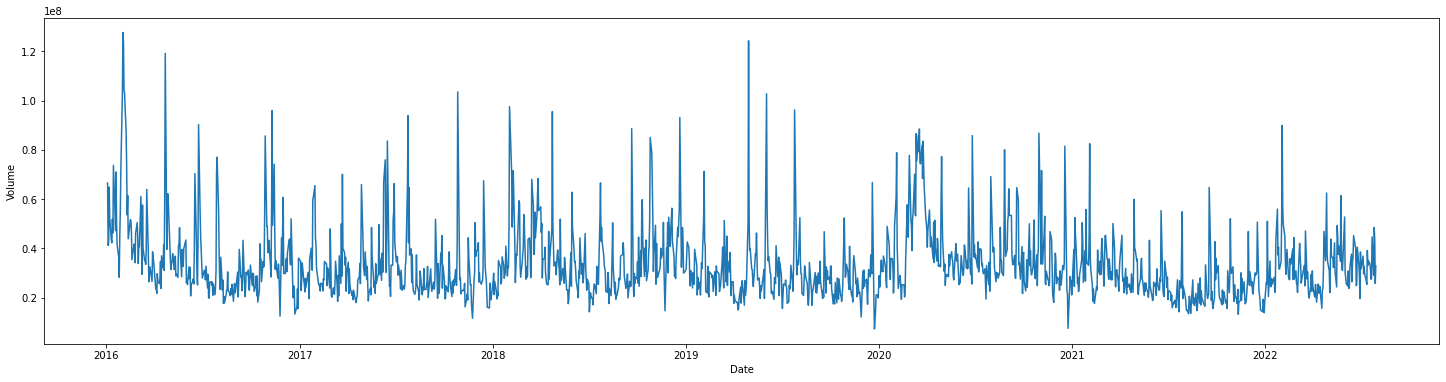

In [262]:
plt.figure(figsize=(25,6))
sns.lineplot(x='Date',y='Volume',data=df)

#most time series decisions to be taken on volume data


In [263]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [264]:
df.rename(columns={'Close':'y','Date':'ds'},inplace=True)
df.head()

,ds,Open,High,Low,y,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [265]:

import prophet as pr
model= pr.Prophet()
model.add_regressor('Open',standardize=False)

model.add_regressor('High',standardize=False)
model.add_regressor('Low',standardize=False)

model.add_regressor('Volume',standardize=False)
model.make_all_seasonality_features(df)
model.fit(df)

09:57:11 - cmdstanpy - INFO - Chain [1] start processing
09:57:11 - cmdstanpy - INFO - Chain [1] done processing
09:57:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Communication error on send
Optimization terminated abnormally. Falling back to Newton.
09:57:11 - cmdstanpy - INFO - Chain [1] start processing
09:57:18 - cmdstanpy - INFO - Chain [1] done processing


In [266]:
df_test=df
df_test.head()

,ds,Open,High,Low,y,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [267]:
forecast=model.predict(df_test)

In [268]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,High,High_lower,High_upper,Low,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,1250.004484,1094.346020,1114.402511,1250.004484,1250.004484,904.222606,904.222606,904.222606,938.609367,...,-1248.167455,-1248.167455,-1248.167455,0.033768,0.033768,0.033768,0.0,0.0,0.0,1104.599613
1,2016-01-05,1250.001079,1114.414933,1134.834298,1250.001079,1250.001079,920.357373,920.357373,920.357373,954.827054,...,-1248.637850,-1248.637850,-1248.637850,0.014877,0.014877,0.014877,0.0,0.0,0.0,1124.788259
2,2016-01-06,1249.997673,1123.563558,1144.728789,1249.997673,1249.997673,926.959439,926.959439,926.959439,957.701618,...,-1249.278688,-1249.278688,-1249.278688,-0.002167,-0.002167,-0.002167,0.0,0.0,0.0,1134.153283
3,2016-01-07,1249.994268,1131.504244,1152.060488,1249.994268,1249.994268,935.979279,935.979279,935.979279,958.954412,...,-1248.327601,-1248.327601,-1248.327601,-0.016921,-0.016921,-0.016921,0.0,0.0,0.0,1141.438057
4,2016-01-08,1249.990862,1119.507146,1140.333680,1249.990862,1249.990862,936.142091,936.142091,936.142091,961.846138,...,-1247.343497,-1247.343497,-1247.343497,-0.028883,-0.028883,-0.028883,0.0,0.0,0.0,1129.745263


In [269]:
forecast=forecast[['ds','yhat']]

In [270]:
forecast.head()

,ds,yhat
0,2016-01-04,1104.599613
1,2016-01-05,1124.788259
2,2016-01-06,1134.153283
3,2016-01-07,1141.438057
4,2016-01-08,1129.745263


In [271]:
final_df=pd.concat((forecast['yhat'],df),axis=1)

In [272]:
final_df.head()

,yhat,ds,Open,High,Low,y,Volume
0,1104.599613,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,1124.788259,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,1134.153283,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,1141.438057,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,1129.745263,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


<AxesSubplot:xlabel='ds', ylabel='y'>

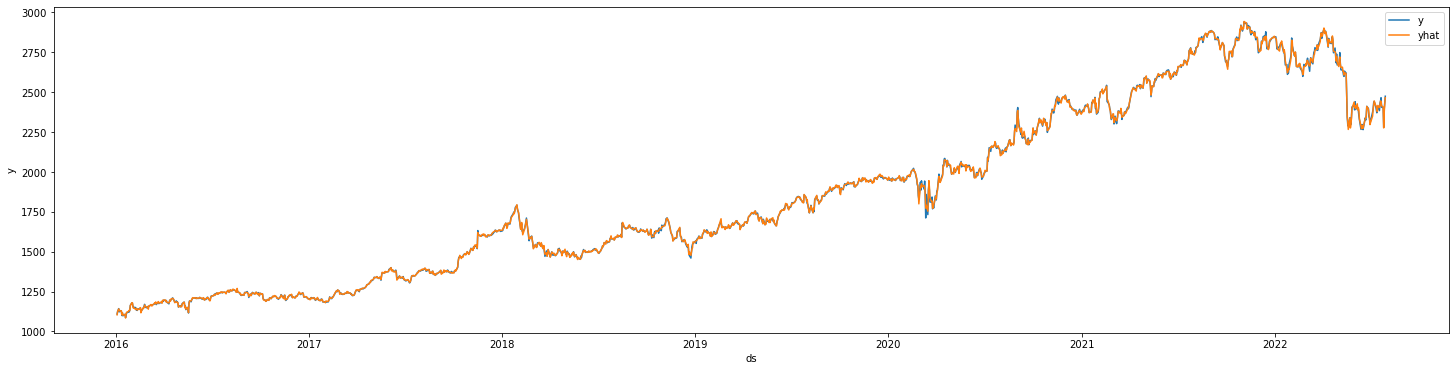

In [273]:
from cProfile import label


plt.figure(figsize=(25,6))
sns.lineplot(x = "ds", y = "y", data = final_df,label='y')
sns.lineplot(x = "ds", y = "yhat", data = final_df,label='yhat')

In [274]:
df_final=pd.read_csv('./test.csv')
df_final['Date']=pd.to_datetime(df_final['Date'])
df_final.sort_values(by=['Date'],inplace=True,ascending=True)
df_final.head()

,Date,Open,High,Low,Volume
0,2022-08-01,2455.71,2500.26,2447.87,24327600
1,2022-08-02,2466.68,2494.73,2447.99,19076300
2,2022-08-03,2473.29,2507.59,2449.39,27459700
3,2022-08-04,2475.98,2487.75,2419.88,23699600
4,2022-08-05,2414.66,2444.17,2409.01,18912400


In [275]:
df_final.rename(columns={'Close':'y','Date':'ds'},inplace=True)
forcast=model.predict(df_final)

In [276]:
forcast=forcast[['ds','yhat']]

In [277]:
final=pd.concat((forcast['yhat'],df_final),axis=1)

In [278]:
final.head()

,yhat,ds,Open,High,Low,Volume
0,2487.370255,2022-08-01,2455.71,2500.26,2447.87,24327600
1,2475.155195,2022-08-02,2466.68,2494.73,2447.99,19076300
2,2481.568005,2022-08-03,2473.29,2507.59,2449.39,27459700
3,2439.218657,2022-08-04,2475.98,2487.75,2419.88,23699600
4,2436.602833,2022-08-05,2414.66,2444.17,2409.01,18912400


In [279]:
ans=final[['ds','yhat']]

In [280]:
ans.head()

,ds,yhat
0,2022-08-01,2487.370255
1,2022-08-02,2475.155195
2,2022-08-03,2481.568005
3,2022-08-04,2439.218657
4,2022-08-05,2436.602833


In [281]:
ans.rename(columns={'yhat':'Close','ds':'Date'},inplace=True)

/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [282]:
ans.head()

,Date,Close
0,2022-08-01,2487.370255
1,2022-08-02,2475.155195
2,2022-08-03,2481.568005
3,2022-08-04,2439.218657
4,2022-08-05,2436.602833


In [283]:
ans.to_csv('./ans.csv',index=False)